In [4]:
# Mengimport Packages atau Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [5]:
# Menghubungkan Google Colab & Drive

from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/Datamining/"

Mounted at /content/gdrive


In [6]:
df = pd.read_csv(path + 'iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
# Menghubungkan Google Colab & Drive

from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/Datamining/"

# Membaca file 'iris.csv' dengan menggunakan variabel 'path'
iris = pd.read_csv(path + 'iris.csv')
iris.info()
iris[0:10]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [8]:
iris_variety = pd.crosstab(index=iris["variety"], columns="count")
iris_variety

col_0,count
variety,
Setosa,50
Versicolor,50
Virginica,50


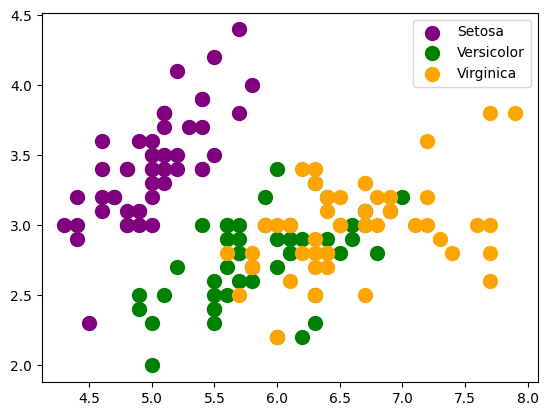

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Inisialisasi encoder untuk mengubah data kategori menjadi one-hot encoding
encoder = OneHotEncoder()

# Menghapus kolom non-numerik ('variety' diasumsikan sebagai kolom label)
df_numeric = iris.drop('variety', axis=1)  # Menggunakan dataframe bernama iris

# Membuat instance OneHotEncoder
encoder = OneHotEncoder()

# Melakukan encoding pada data kategori ('variety')
categorical_data = iris[['variety']]  # Data kategori diambil dari kolom 'variety'
encoded_categorical = encoder.fit_transform(categorical_data).toarray()  # Hasil encoding dalam bentuk array

# Mengonversi hasil encoding menjadi DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['variety']))

# Menggabungkan data numerik dan data kategori yang telah di-encode
final_df = pd.concat([df_numeric, encoded_df], axis=1)

# Menangani nilai yang hilang menggunakan SimpleImputer dengan strategi 'mean' (rata-rata)
imputer = SimpleImputer(strategy='mean')  # Anda dapat memilih strategi lain jika diperlukan
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns=final_df.columns)

# Melakukan clustering menggunakan algoritma K-Means
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(final_df_imputed)

# Memvisualisasikan hasil clustering (diasumsikan data memiliki 2 fitur untuk visualisasi)
plt.scatter(final_df_imputed.iloc[y_kmeans == 1, 0], final_df_imputed.iloc[y_kmeans == 1, 1], s=100,
            c='purple', label='Setosa')  # Cluster 2
plt.scatter(final_df_imputed.iloc[y_kmeans == 0, 0], final_df_imputed.iloc[y_kmeans == 0, 1], s=100,
            c='green', label='Versicolor')  # Cluster 1
plt.scatter(final_df_imputed.iloc[y_kmeans == 2, 0], final_df_imputed.iloc[y_kmeans == 2, 1], s=100,
            c='orange', label='Virginica')  # Cluster 3

# Menampilkan plot hasil clustering
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan grafik


In [10]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

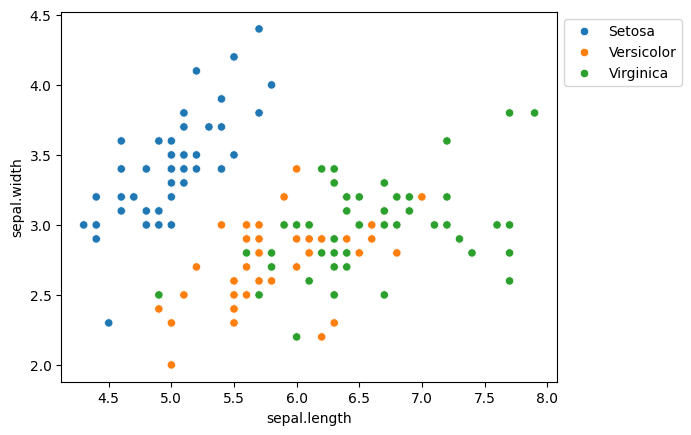

In [11]:
sns.scatterplot(x="sepal.length", y="sepal.width", hue="variety", data=iris)

# Penempatan Legend Diluar gambar
plt.legend(bbox_to_anchor=(1, 1), loc=2 )
plt.show()

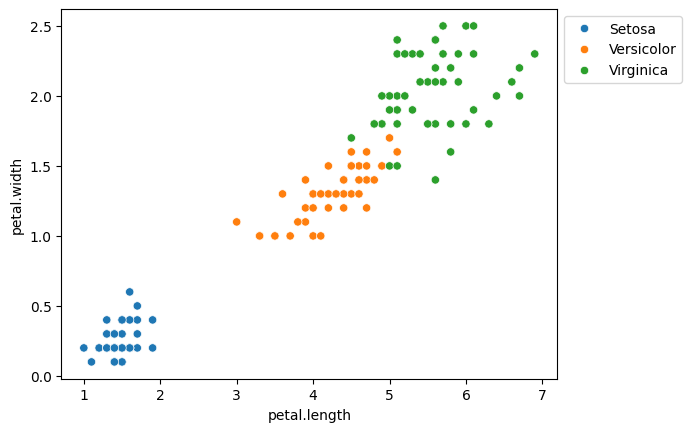

In [12]:
sns.scatterplot(x="petal.length", y="petal.width", hue="variety", data=iris)

# Penempatan Legend Diluar gambar
plt.legend(bbox_to_anchor=(1, 1), loc=2 )
plt.show()

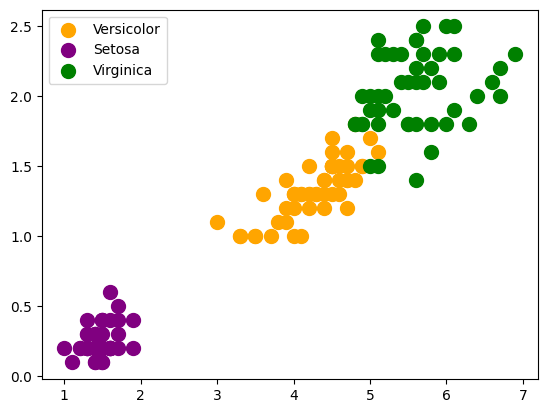

In [18]:
# Visualize the clusters (assuming your data has 2 features for visualization)
plt.scatter(final_df_imputed.iloc[y_kmeans == 0, 2], final_df_imputed.iloc[y_kmeans == 0, 3], s=100,
            c='orange', label='Versicolor')
plt.scatter(final_df_imputed.iloc[y_kmeans == 1, 2], final_df_imputed.iloc[y_kmeans == 1, 3], s=100,
            c='purple', label='Setosa')
plt.scatter(final_df_imputed.iloc[y_kmeans == 2, 2], final_df_imputed.iloc[y_kmeans == 2, 3], s=100,
            c='green', label='Virginica')

# Show the plot
plt.legend()
plt.show()